<a href="https://colab.research.google.com/github/geohotz-png1/f_internship_ml/blob/main/FUTURE_ML_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
# Load your dataset
import pandas as pd
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.dropna(inplace=True)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df['TotalServices'] = (df[['PhoneService_Yes', 'InternetService_Fiber optic',
                           'StreamingTV_Yes']].sum(axis=1))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = xgb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[925 111]
 [173 200]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1036
           1       0.64      0.54      0.58       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



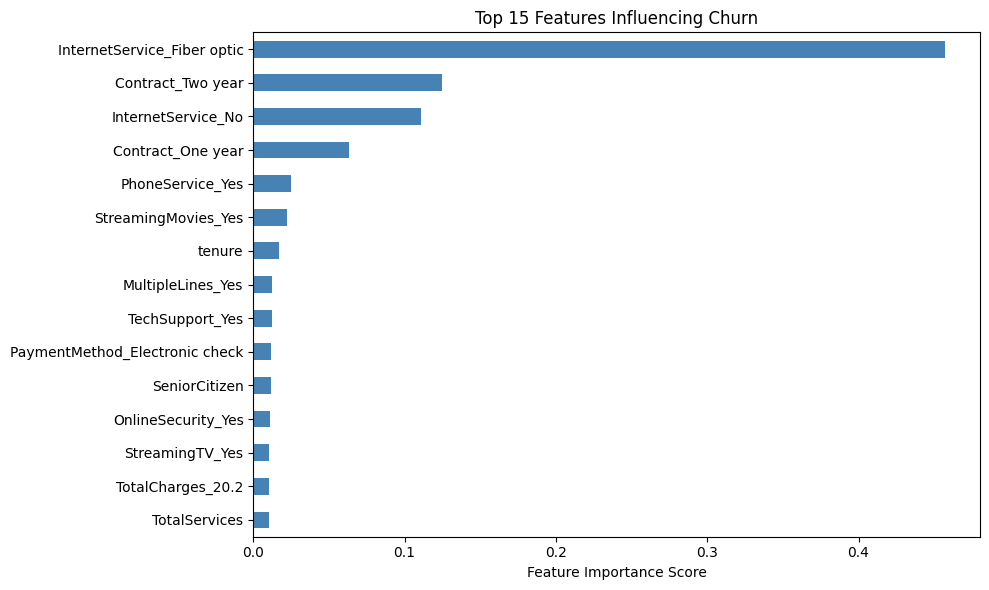

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

importances = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=True)
importances.tail(15).plot(kind='barh', figsize=(10, 6), color='steelblue')
plt.title("Top 15 Features Influencing Churn")
plt.xlabel("Feature Importance Score")
plt.tight_layout()
plt.show()

In [ ]:
xgb = XGBClassifier(
    learning_rate=0.1,
    max_depth=4,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

[[942  94]
 [162 211]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.57      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

ROC-AUC Score: 0.8616119949900112


In [ ]:
df_results = X_test.copy()
df_results['Actual_Churn'] = y_test.values
df_results['Predicted_Churn'] = y_pred
df_results['Churn_Probability'] = y_proba

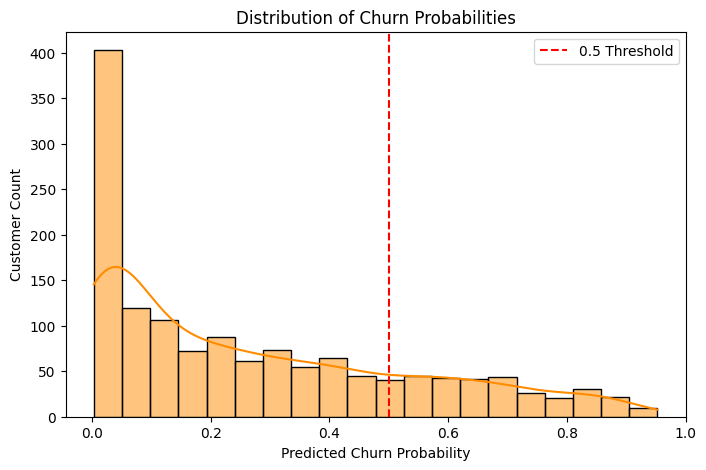

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df_results['Churn_Probability'], bins=20, kde=True, color='darkorange')
plt.title('Distribution of Churn Probabilities')
plt.xlabel('Predicted Churn Probability')
plt.ylabel('Customer Count')
plt.axvline(0.5, color='red', linestyle='--', label='0.5 Threshold')
plt.legend()
plt.show()

In [ ]:
high_risk_customers = df_results.sort_values(by='Churn_Probability', ascending=False).head(10)
high_risk_customers[['Churn_Probability', 'Predicted_Churn']]

,Churn_Probability,Predicted_Churn
2208,0.952700,1
4800,0.937930,1
2577,0.930673,1
534,0.925351,1
3352,0.924788,1
1371,0.914593,1
1410,0.914217,1
80,0.913327,1
585,0.905901,1
3346,0.905579,1


In [ ]:
df_results = X_test.copy()
df_results['Actual_Churn'] = y_test.values
df_results['Predicted_Churn'] = y_pred
df_results['Churn_Probability'] = xgb.predict_proba(X_test)[:,1]
df_results.to_csv('churn_results.csv', index=False)


In [ ]:
from google.colab import files
files.download('churn_results.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>